In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>


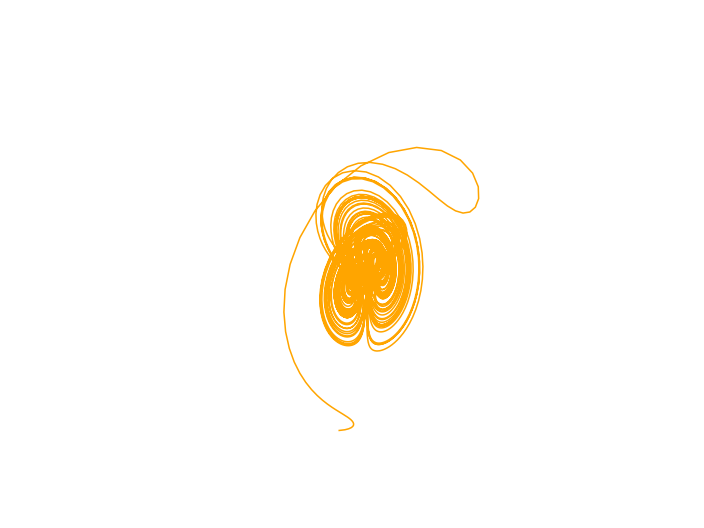

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# fungsi untuk menghitung sistem Lorenz
def lorenz_system(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# fungsi untuk mengupdate plot pada setiap frame
def update(num, ax, line):
    # menghitung sistem Lorenz
    dt = 0.01
    x_dot, y_dot, z_dot = lorenz_system(x[num], y[num], z[num])
    x[num+1] = x[num] + (x_dot * dt)
    y[num+1] = y[num] + (y_dot * dt)
    z[num+1] = z[num] + (z_dot * dt)
    
    # memperbarui posisi plot
    line.set_data(x[:num+1], y[:num+1])
    line.set_3d_properties(z[:num+1])
    return line,

# membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))
ax.set_axis_off()
line, = ax.plot([], [], [], lw=1,color='orange')

# membuat titik awal
np.random.seed(1)
x0 = -15 + 30*np.random.random(3)
x, y, z = [np.zeros(10000) for i in range(3)]
x[0], y[0], z[0] = x0[0], x0[1], x0[2]

# membuat animasi
ani = FuncAnimation(fig, update, frames=range(9999), fargs=(ax, line), interval=10, blit=True)

# menampilkan animasi
plt.show()
